# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1551933387000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":285},"features":[{"type":"Feature","properties":{"mag":5.2,"place":"37km NNE of Chongoyape, Peru","time":1551931513970,"updated":1551933242677,"tz":-300,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us1000jbpr","detail":"https://earthquake.usgs.gov/ear


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 5.2, 'place': '37km NNE of Chongoyape, Peru', 'time': 1551931513970, 'updated': 1551933242677, 'tz': -300, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jbpr', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jbpr.geojson', 'felt': 5, 'cdi': 2, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 417, 'net': 'us', 'code': '1000jbpr', 'ids': ',us1000jbpr,', 'sources': ',us,', 'types': ',dyfi,geoserve,origin,phase-data,', 'nst': None, 'dmin': 6.089, 'rms': 0.82, 'gap': 131, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 5.2 - 37km NNE of Chongoyape, Peru'}, 'geometry': {'type': 'Point', 'coordinates': [-79.2298, -6.3364, 61.46]}, 'id': 'us1000jbpr'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-79.2298, -6.3364, 61.46], 'type': 'Point'}
{'alert': None,
 'cdi': 2,
 'code': '1000jbpr',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jbpr.geojson',
 'dmin': 6.089,
 'felt': 5,
 'gap': 131,
 'ids': ',us1000jbpr,',
 'mag': 5.2,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '37km NNE of Chongoyape, Peru',
 'rms': 0.82,
 'sig': 417,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1551931513970,
 'title': 'M 5.2 - 37km NNE of Chongoyape, Peru',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',dyfi,geoserve,origin,phase-data,',
 'tz': -300,
 'updated': 1551933242677,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jbpr'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 5.2 - 37km NNE of Chongoyape, Peru
M 4.9 - Northern Mid-Atlantic Ridge
M 4.9 - 132km SSW of Hengchun, Taiwan
M 5.0 - 109km SE of L'Esperance Rock, New Zealand
M 2.9 - 76km SSW of Kobuk, Alaska
M 2.7 - 7km NNW of Meadow Lakes, Alaska
M 5.0 - 155km WNW of Tobelo, Indonesia
M 2.9 - 68km SSW of Kobuk, Alaska
M 3.0 - 71km SSW of Kobuk, Alaska
M 3.1 - 78km SSW of Kobuk, Alaska
M 2.6 - 74km SSW of Kobuk, Alaska
M 3.3 - 64km SSW of Kobuk, Alaska
M 5.1 - 139km SE of L'Esperance Rock, New Zealand
M 5.2 - 68km SSW of Kobuk, Alaska
M 4.7 - 165km SW of Al Qunfidhah, Saudi Arabia
M 2.5 - 7km NE of Harper, Kansas
M 5.7 - 139km SE of L'Esperance Rock, New Zealand
M 5.0 - 161km SSW of Al Qunfidhah, Saudi Arabia
M 5.0 - Volcano Islands, Japan region
M 4.9 - 40km S of Ofunato, Japan
M 2.8 - 229km SE of Kodiak, Alaska
M 5.6 - 15km NNE of Ambunti, Papua New Guinea
M 4.0 - 29km SSE of Ofunato, Japan
M 2.6 - 16km NNE of Coalgate, Oklahoma
M 2.7 - 33km WNW of Kobuk, Alaska
M 2.5 - 17km NNW of Anchorage, Ala

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

285


In [9]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0        5.2  61.46
1        4.9  10.00
2        4.9  10.00
3        5.0  35.00
4        2.9   3.40


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  285.000000  285.000000
mean     3.704246   44.874140
std      1.006249   78.572808
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.370000   16.490000
75%      4.600000   48.120000
max      7.000000  573.630000


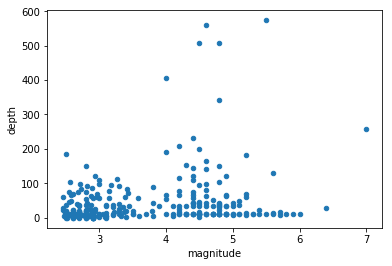

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [18]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude  depth
0        5.2  61.46
1        4.9  10.00
2        4.9  10.00
3        5.0  35.00
4        2.9   3.40


C:\Users\Zimmerman1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [18]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [19]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [20]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [ ]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [21]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [22]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [23]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [24]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: #BBN, it's not too late to join. Exclusive content that you won't find anywhere else. Directions ⤵️ https://t.co/ichzpiMD8m


In [25]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 06 22:20:10 +0000 2019',
 'entities': {'hashtags': [{'indices': [17, 21], 'text': 'BBN'}],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/KentuckyMBB/st…',
                        'expanded_url': 'https://twitter.com/KentuckyMBB/status/1087141644867112961',
                        'indices': [117, 140],
                        'url': 'https://t.co/ichzpiMD8m'}],
              'user_mentions': [{'id': 35583547,
                                 'id_str': '35583547',
                                 'indices': [3, 15],
                                 'name': 'Kentucky Basketball',
                                 'screen_name': 'KentuckyMBB'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1103420031386435586,
 'id_str': '1103420031386435586',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 

### Other API endpoints allow different types of searches

In [26]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

JUST A REMINDER ABOUT THIS MORNING’S MEETING?
@BBNBallito Business Network Meeting on Thursday, 7 March @ 8:30am, S… https://t.co/I2IwcKRrSj

#KSR #BBN #KSRtop10

Talked @KentuckyMBB vs Ole Miss &amp; UT. Spencer Cassidy and Nick Montana stopped by to talk #MarchMadness and… https://t.co/dziOR5yTRw

We talked UK vs Ole Miss and UT, #Lakers hot mess, #NationalOreoCookieDay and more. Talked #MarchMadness w/ Spencer… https://t.co/NRVMdy4n9G

RT @UKFootball: Rise and shine, #BBN. It’s Day 3 of Spring Practice!

#Bringit https://t.co/0jMzcrghje



In [27]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @DrKumarVishwas: ये क्या बेहूदगी है ? पाकिस्तान चाहता है कि कश्मीरियों के मन में बाक़ी देश के प्रति नफ़रत बढ़े और ये लंफगे उसी दिशा मे…

RT @BHAKTRIOT1811: ✍️.........................................
.
.
. 
. 
.
.
.
.
.
.
.
.
👉कभी कभी बगैर "thought" 💭 भी सुबह अच्छी हो जाती है…

@rssurjewala ईसे सुप्रीम कोर्ट तक ले जाऐ । सनसकारि का नकाब के पीछे चौर है। नमामि गंगे के नाम पर खर्च पैसे ,सवछ भारत… https://t.co/IUADi9tAcE

विधायक ने सीनियर को गाली बककर औकात दिखाई पाकिस्तान की तरह।
सांसद ने 4 सेकंड में ताबड़तोड़ 7 चप्पल बम बरसाए भारत की… https://t.co/O61A8A89aX

RT @meerabai021: हर घड़ी रहता है मेरे पास तू
सारा जग तेरे लिए हैरान है
नाचता है रब को ‘मुर्शिद’ देखकर
मैं समझता हूं यही निर्वाण है
----सद्…



In [28]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@ColeBoyle3 hey lil buddy.... why ya hiding over there??? https://t.co/BwOBqgVenZ

I would like to scream

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0

Madama Butterfly 🦋
#Opera #GNO @ Singletary Center for the Arts https://t.co/XgxZUlBBB5

hbd justin bieber ( michael_rutherford_ ) hope you have the worst day ever cause you deserve it 🥴 swipe for a surpr… https://t.co/cKupMId15q

.@universityofky can you please turn on the heat in the graduate student study? It's hard to write dissertations wi… https://t.co/bzFJSE26lc



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [29]:
#search my own tweets

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'adamzimm24', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @ImPeterSohn: Get you a friend who will lend you the coldest shirt in his closet ⬇️⬇️ #FinsUp https://t.co/tL7U5pTWpN

#TweetAPictureYouCantExplain Get you a friend that does a photo shoot with you at the 24hr McD's sign. Happy birthd… https://t.co/cxVRebZrQg

RT @BarstoolBigCat: Junior is always the biggest star in the room https://t.co/YBXmM0fL2A

RT @ESPNNBA: Zion may have won the dunk contest in high school, but Hamidou Diallo wants that rematch on the big stage  😤 https://t.co/rOmI…

RT @LegionHoops: HAMIDOU DIALLO. 🔥🔥🔥 https://t.co/ZfNlgJVxWo



In [30]:
# search for public tweets about #ThunderUp

endpoint = 'search/tweets'
params = {
    'q': '#ThunderUp', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @gdfactoryclips: WATCH / Russell Westbrook CLUTCH Full Highlights #ThunderUp vs Grizzlies 2019.03.03 - 22 Points https://t.co/qht5WnIuzk

#Thunderup

Fun times working @okcblue scorers table with my fellow 🏀 friends. #ThunderUp https://t.co/seQiIYnUfj

RT @topnbaanalysis: #Rockets vs. #DubNation this season: 3-0 (one game with Harden and Paul). 

#ThunderUp/#WeTheNorth/#CUsRise/#HereTheyCo…

RT @TheWestbrookEra: 14/17 ESPN writers predicted the Spurs to defeat OKC in the 2nd round of the 2016 Playoffs.

The Media sleeping on OKC…



In [31]:
# search for public tweets geotagged near Cincinnati

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '39.10713,-84.50413,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Tomorrow night at the Q, we have the boogie woogie blues with Cincinnati legend, Ricky Nye on piano and Chris Dougl… https://t.co/dislGGDf2U

I'm at FitNext in Cincinnati, OH https://t.co/UQlOVrtK7F

Just another rollicking good time at the Q this past weekend.
.
#epicbarbecue #epicentertainment #bockfest… https://t.co/fWpR9P3h0G

Had a great day today with @1diva68 at P&amp;G’s #WeSeeEqual Forum celebrating #WomensDay! Highlight of the day was mee… https://t.co/4B7GYY8S46

Had a great day today with @1diva68 at P&amp;G’s #WeSeeEqual Forum celebrating #WomensDay! Highlight of the day was mee… https://t.co/098o5x44BW

Had a great day today with @1diva68 at P&amp;G’s #WeSeeEqual Forum celebrating #WomensDay! Highlight of the day was mee… https://t.co/QO2XXCao5H

We're hiring in #Cincinnati, OH! Click the link in our bio to apply to this job and more: Pre-Sales Engineer at Morisey Dart #IT

#WeSeeEqual #PGEMP #PGEmployee @ P&amp;G - GO (Cincinnati Downtown) https://t.co/d2i0PHE3fF

#WeSee

In [32]:
#search my own tweets language

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'adamzimm24', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['lang'] + '\n')

en

en

en

en

en



### Bonus: Streaming live tweets in real time 

In [ ]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [15]:
for q in quakes:
    print(q['geometry']['coordinates'])

[-79.2298, -6.3364, 61.46]
[-44.6679, 13.453, 10]
[120.3265, 20.8758, 10]
[-178.1301, -32.1722, 35]
[-157.3484, 66.2468, 3.4]
[-149.6532, 61.6899, 32.9]
[126.6579, 2.0983, 44.04]
[-157.2161, 66.309, 0]
[-157.3037, 66.2927, 7.61]
[-157.3818, 66.2305, 13.4]
[-157.4072, 66.2194, 5.4]
[-157.1878, 66.3447, 24.4]
[-177.7028, -32.1609, 10]
[-157.1853, 66.3088, 9.3]
[40.1442, 17.921, 10]
[-97.9607, 37.3332, 5]
[-177.784, -32.2567, 7.09]
[40.2353, 17.913, 10]
[143.8459, 23.1285, 8.28]
[141.7579, 38.7067, 63]
[-149.8542, 56.2756, 12]
[142.9167, -4.1175, 129.13]
[141.8924, 38.8394, 54.54]
[-96.1188, 34.6648, 5]
[-157.6124, 66.9819, 0]
[-150.068, 61.3519, 36.1]
[164.4347, 55.2272, 10]
[-148.4483, 56.3164, 10]
[-177.926, -31.8884, 10]
[-177.8792, -32.0264, 29]
[-66.4111, 18.4308, 109]
[126.9868, 3.5389, 48.12]
[-85.5154, 16.3309, 10]
[-150.1051, 61.3792, 14.2]
[-93.662, 14.6063, 33.68]
[176.4621, 51.2924, 10]
[126.922, 2.2555, 51.42]
[-146.3241, 61.569, 18.7]
[-66.8686, 19.0578, 10]
[-97.5054, -36.

In [16]:
#make a data frame of latitude and longitude
d = {'lat': [q['geometry']['coordinates'][0] for q in quakes],
     'long': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

df

,lat,long
0,-79.229800,-6.336400
1,-44.667900,13.453000
2,120.326500,20.875800
3,-178.130100,-32.172200
4,-157.348400,66.246800
5,-149.653200,61.689900
6,126.657900,2.098300
7,-157.216100,66.309000
8,-157.303700,66.292700
9,-157.381800,66.230500


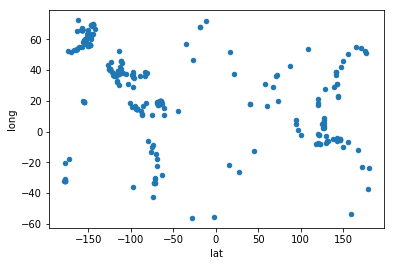

In [17]:
#plot the latitude and longitude on a scatterplot
df.plot(x='lat', y='long', kind='scatter')

In [ ]:
#Cannot accsess the google maps API

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
